In [1]:
# !pip install python-resize-image
# !pip install kaggle-cli

In [2]:
# !pip install --no-cache-dir -I pillow
# !pip install Pillow==4.0.0
# !pip install PIL
# !pip install image

https://forums.fast.ai/t/attributeerror-module-pil-image-has-no-attribute-register-extensions/10689/5

In [3]:
import os
import re
import urllib
import urllib.request
import urllib.parse
from PIL import Image
from resizeimage import resizeimage

In [4]:
# !pip install Pillow
import PIL
from PIL import Image

In [5]:
if not os.path.exists("dogsCats/train"):
#     !kg download -u user -p mdp -c dogs-vs-cats
    !mkdir dogsCats;cd dogsCats;ls
    !mv test1.zip train.zip dogsCats/
    !cd dogsCats; unzip train.zip
    !cd dogsCats;rm -rf test1.zip train.zip;ls 

In [132]:
if not os.path.exists("dogsCats/train/Dog") and not os.path.exists("dogsCats/train/Cat"):
    trainImgs = os.listdir('dogsCats/train/')
    !mkdir dogsCats/train/Dog dogsCats/train/Cat
    for img in trainImgs:
        if 'cat' in img:
            os.rename('dogsCats/train/' + img, 'dogsCats/train/Cat/' + img)
        elif 'dog' in img:
            os.rename('dogsCats/train/' + img, 'dogsCats/train/Dog/' + img)    

hello


In [134]:
# nbTrain = len(os.listdir('"dogsCats/train/Dog"')) + len(os.listdir('"dogsCats/train/Cat"'))
dogImgs = os.listdir('dogsCats/train/Dog')
catImgs = os.listdir('dogsCats/train/Cat')
if not os.path.exists("dogsCats/test1/Dog") and not os.path.exists("dogsCats/test1/Cat"):
    !mkdir dogsCats/test1/Dog dogsCats/test1/Cat
nbDog = len(dogImgs)
nbCat = len(catImgs)
lim = nbDog * 0.2
for ind, (dog, cat) in enumerate(zip(dogImgs, catImgs)):
    if ind > lim:
        print (ind)
        break;
    os.rename('dogsCats/train/Dog/' + dog, 'dogsCats/test1/Dog/' + dog)
    os.rename('dogsCats/train/Cat/' + cat, 'dogsCats/test1/Cat/' + cat)

2501


In [142]:
dogImgs = os.listdir('dogsCats/train/Dog')
catImgs = os.listdir('dogsCats/train/Cat')
nb_train_samples = len(dogImgs) + len(catImgs)
dogImgs = os.listdir('dogsCats/test1/Dog')
catImgs = os.listdir('dogsCats/test1/Cat')
nb_validation_samples = len(dogImgs) + len(catImgs)

In [91]:
from skimage.io import imread, imsave
from skimage.transform import resize

In [92]:
import tensorflow as tf
import keras as K

In [93]:
print (tf.__version__, K.__version__)

1.12.0 2.2.4


In [94]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
import cv2 as cv
%pylab inline

import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

import tensorflow as tf
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *
from keras.layers.advanced_activations import LeakyReLU
# import keras_utils

Populating the interactive namespace from numpy and matplotlib


/root/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['average', 'multiply', 'dot', 'concatenate', 'imsave', 'add', 'maximum', 'minimum', 'subtract', 'copy', 'imread', 'resize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [95]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [96]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device = device_lib.list_local_devices()
#     print (local_device)
    return [x.name for x in local_device if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

In [97]:
BATCH_SIZE = 64
INIT_LR = 5e-3 

In [98]:
!cd dogsCats/ ; ls ; find train -type f | wc -l

train
24999


In [99]:
path = './dogsCats/train'
imgs = []

In [100]:
for path, subdirs, files in os.walk(path):
    for name in files:
        imgs.append(os.path.join(path, name))

In [101]:
print (imgs[:5])

['./dogsCats/train/Dog/dog.1236.jpg', './dogsCats/train/Dog/dog.11306.jpg', './dogsCats/train/Dog/dog.1282.jpg', './dogsCats/train/Dog/dog.8404.jpg', './dogsCats/train/Dog/dog.12287.jpg']


In [107]:
lbls = []
for img in imgs:
    if 'cat' in img:
        lbls.append(0)
    else:
        lbls.append(1)

In [108]:
print (len(imgs), len(lbls))

24999 24999


In [109]:
i = 0
count = 0
nbImgs = len(imgs)

In [110]:
def reduce_dataset(cut, nbImgs, lbls, imgs):
    dog = cat = int((cut/2)*nbImgs)
    print (dog, cat)
    if int((cut*nbImgs)) != len(imgs):
        for ind, (img, lbl) in enumerate(zip(imgs, lbls)):
            if lbl == 0 and cat != 0:
                del lbls[ind]
                del imgs[ind]
                cat -= 1
            if lbl == 1 and dog != 0:
                del lbls[ind]
                del imgs[ind]
    nbImgs = len(imgs)
    print (nbImgs)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


FileNotFoundError: [Errno 2] No such file or directory: './dogsCats/train/Dog/dog.5258.jpg'

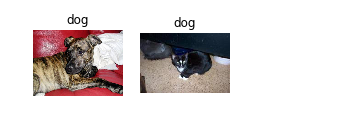

In [178]:
cols = 8
rows = 3
#pour allouer un cadre
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        #on place chacune des images sur le cadre
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(Image.open(imgs[random_index]))
        ax.set_title('dog' if 'dog' in imgs[random_index] else 'cat')
plt.show()

In [168]:
def plot_history(history):
    # historique pour l'accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # historique pour la loss function
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [186]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

def resnet():
    base_model = ResNet50(weights='imagenet', include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    pred = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=pred)
    return model

In [187]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

def vgg():
    base_model = ResNet50(weights='imagenet', include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    pred = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=pred)
    return model

In [188]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [189]:
K.clear_session()
# model = resnet()
# model = vgg()
model = create_model()

In [190]:
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [194]:
batch_size = 32
train_data_dir = 'dogsCats/train/'
validation_data_dir = 'dogsCats/test1/'
img_height, img_width = 150, 150
epochs = 10
# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

Found 19997 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [195]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
624/624 [==============================] - 101s 161ms/step - loss: 0.6657 - acc: 0.5801 - val_loss: 0.5910 - val_acc: 0.6981
Epoch 2/10
624/624 [==============================] - 99s 159ms/step - loss: 0.5900 - acc: 0.6867 - val_loss: 0.5088 - val_acc: 0.7483
Epoch 3/10
624/624 [==============================] - 99s 159ms/step - loss: 0.5361 - acc: 0.7408 - val_loss: 0.5074 - val_acc: 0.7429
Epoch 4/10
624/624 [==============================] - 99s 159ms/step - loss: 0.5025 - acc: 0.7693 - val_loss: 0.4509 - val_acc: 0.7803
Epoch 5/10
624/624 [==============================] - 100s 160ms/step - loss: 0.4783 - acc: 0.7788 - val_loss: 0.4343 - val_acc: 0.7942
Epoch 6/10
624/624 [==============================] - 99s 159ms/step - loss: 0.4567 - acc: 0.7941 - val_loss: 0.4363 - val_acc: 0.7877
Epoch 7/10
624/624 [==============================] - 99s 159ms/step - loss: 0.4402 - acc: 0.8060 - val_loss: 0.4052 - val_acc: 0.8032
Epoch 8/10
624/624 [==============================] -

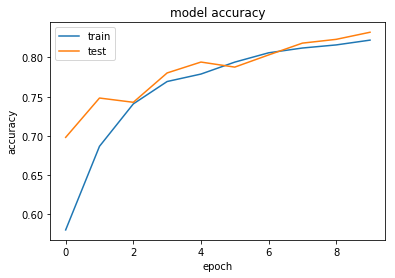

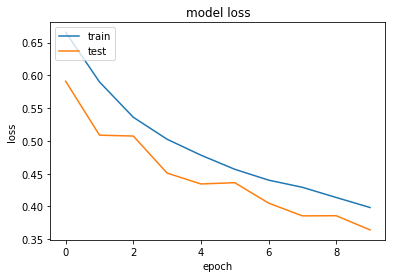

In [196]:
plot_history(history)

In [176]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
624/624 [==============================] - 100s 161ms/step - loss: 0.6782 - acc: 0.5671 - val_loss: 0.6240 - val_acc: 0.6651
Epoch 2/5
624/624 [==============================] - 99s 159ms/step - loss: 0.6118 - acc: 0.6736 - val_loss: 0.5541 - val_acc: 0.7344
Epoch 3/5
624/624 [==============================] - 99s 159ms/step - loss: 0.5552 - acc: 0.7201 - val_loss: 0.5023 - val_acc: 0.7547
Epoch 4/5
624/624 [==============================] - 99s 158ms/step - loss: 0.5103 - acc: 0.7585 - val_loss: 0.4796 - val_acc: 0.7714
Epoch 5/5
624/624 [==============================] - 100s 160ms/step - loss: 0.4737 - acc: 0.7814 - val_loss: 0.4271 - val_acc: 0.7998


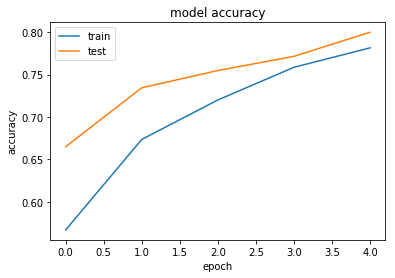

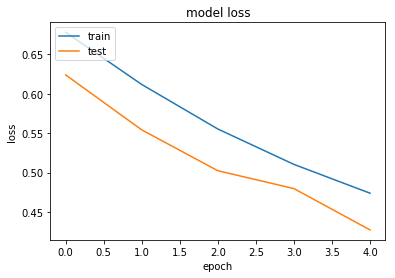

In [177]:
plot_history(history)

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)

In [167]:
# fine-tune the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
624/624 [==============================] - 152s 244ms/step - loss: 0.5932 - acc: 0.6936 - val_loss: 0.6720 - val_acc: 0.7530
Epoch 2/5
624/624 [==============================] - 144s 231ms/step - loss: 0.2753 - acc: 0.8831 - val_loss: 0.4841 - val_acc: 0.8608
Epoch 3/5
624/624 [==============================] - 144s 231ms/step - loss: 0.2036 - acc: 0.9174 - val_loss: 0.2391 - val_acc: 0.8990
Epoch 4/5
624/624 [==============================] - 144s 231ms/step - loss: 0.1831 - acc: 0.9258 - val_loss: 0.3211 - val_acc: 0.8507
Epoch 5/5
624/624 [==============================] - 144s 231ms/step - loss: 0.1600 - acc: 0.9356 - val_loss: 0.2175 - val_acc: 0.9070


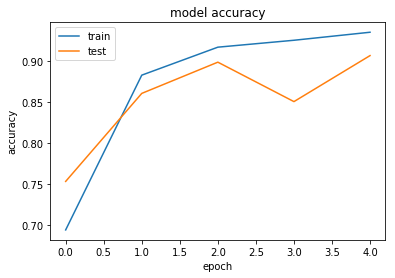

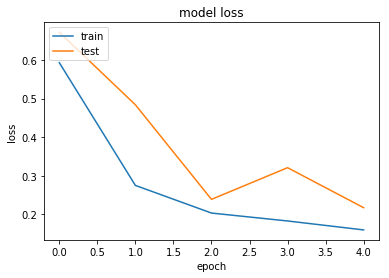

In [175]:
plot_history(history)

In [156]:
# fine-tune the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size)

Found 19997 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.
Epoch 1/5
624/624 [==============================] - 152s 244ms/step - loss: 0.6287 - acc: 0.6759 - val_loss: 0.6922 - val_acc: 0.7246
Epoch 2/5
624/624 [==============================] - 145s 232ms/step - loss: 0.2867 - acc: 0.8795 - val_loss: 0.3170 - val_acc: 0.8676
Epoch 3/5
624/624 [==============================] - 144s 231ms/step - loss: 0.2102 - acc: 0.9139 - val_loss: 1.5265 - val_acc: 0.7101
Epoch 4/5
624/624 [==============================] - 144s 231ms/step - loss: 0.1794 - acc: 0.9273 - val_loss: 0.3679 - val_acc: 0.8408
Epoch 5/5
624/624 [==============================] - 144s 231ms/step - loss: 0.1653 - acc: 0.9305 - val_loss: 0.3141 - val_acc: 0.8537


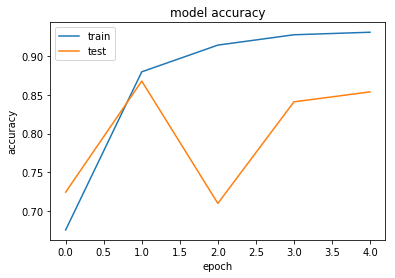

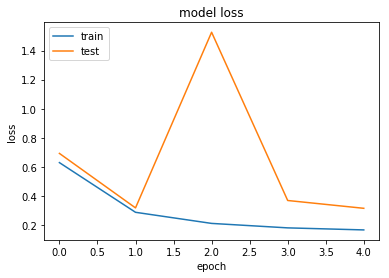

In [157]:
print ('resnet 5 epochs')

plot_history(history)

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

<b>Objectif:</b>
- atteindre les 90% sans overfitting